<a href="https://colab.research.google.com/github/juanehdzvqz85/DemoSep9/blob/develop/Google_Gemini_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl ipinfo.io

{
  "ip": "34.106.214.53",
  "hostname": "53.214.106.34.bc.googleusercontent.com",
  "city": "Salt Lake City",
  "region": "Utah",
  "country": "US",
  "loc": "40.7608,-111.8911",
  "org": "AS396982 Google LLC",
  "postal": "84101",
  "timezone": "America/Denver",
  "readme": "https://ipinfo.io/missingauth"
}

In [4]:
pip install -q -U google-generativeai

In [ ]:
import yaml

with open('gemini_key.yml', 'r') as file:
    api_creds = yaml.safe_load(file)

GOOGLE_API_KEY = api_creds['gemini_key']

In [ ]:
import google.generativeai as genai

genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

In [7]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
%%time
response = model.generate_content("Explain Generative AI with 3 bullet points")

CPU times: user 104 ms, sys: 15 ms, total: 119 ms
Wall time: 7.93 s


In [8]:
print(response.text)

NameError: name 'response' is not defined

In [ ]:
to_markdown(response.text)

> - **Creates new data or content from scratch:** Generative AI is capable of producing novel information, such as text, images, audio, or code, that is both unique and realistic. It does this by learning the underlying patterns and structures of data, and using this knowledge to generate new examples that follow the same patterns.
> 
> 
> - **Unsupervised learning:** Generative AI is capable of learning from unlabeled data, which means that it does not require human input to identify patterns and structures. This makes it particularly useful for tasks where labeled data is scarce, expensive, or difficult to obtain.
> 
> 
> - **Diverse range of applications:** Generative AI has a wide range of potential applications across various fields, including natural language processing, image synthesis, music generation, and drug discovery. It is also playing a role in developing new materials and designing new products.

In [ ]:
it_support_queue = [
    "I can't access my email. It keeps showing an error message. Please help.",
    "Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?",
    "Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.",
    "Eine wichtige Software stürzt ständig ab und beeinträchtigt meine Arbeit. Können Sie das Problem beheben?",
    "我无法访问公司的网站。每次都显示错误信息。请帮忙解决。"
]

it_support_queue_msgs = f"""
"""
for i, msg in enumerate(it_support_queue):
  it_support_queue_msgs += "\nMessage " + str(i+1) + ": " + msg

print(it_support_queue_msgs)



Message 1: I can't access my email. It keeps showing an error message. Please help.
Message 2: Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?
Message 3: Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.
Message 4: Eine wichtige Software stürzt ständig ab und beeinträchtigt meine Arbeit. Können Sie das Problem beheben?
Message 5: 我无法访问公司的网站。每次都显示错误信息。请帮忙解决。


In [ ]:
prompt = f"""
Act as a customer support agent. Remember to ask for relevant information based on the customer issue to solve the problem.
Don't deny them help without asking for relevant information. For each support message mentioned below
in triple backticks, create a response as a table with the following columns:


  orig_msg: The original customer message
  orig_lang: Detected language of the customer message e.g. Spanish
  trans_msg: Translated customer message in English
  response: Response to the customer in orig_lang
  trans_response: Response to the customer in English


Messages:
'''{it_support_queue_msgs}'''
"""

print(prompt)


Act as a customer support agent. Remember to ask for relevant information based on the customer issue to solve the problem.
Don't deny them help without asking for relevant information. For each support message mentioned below
in triple backticks, create a response as a table with the following columns:


  orig_msg: The original customer message
  orig_lang: Detected language of the customer message e.g. Spanish
  trans_msg: Translated customer message in English
  response: Response to the customer in orig_lang
  trans_response: Response to the customer in English


Messages:
'''

Message 1: I can't access my email. It keeps showing an error message. Please help.
Message 2: Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?
Message 3: Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.
Message 4: Eine wichtige Software stürzt ständig ab und beeinträchtigt meine Arbeit. Können Sie das Problem beheben?
M

In [ ]:
response = model.generate_content(prompt)

In [ ]:
print(response.text)

| orig_msg | orig_lang | trans_msg | response | trans_response |
|---|---|---|---|---|
| I can't access my email. It keeps showing an error message. Please help. | English | I can't access my email. It keeps showing an error message. Please help. | Es posible que su cuenta haya sido pirateada. ¿Puede proporcionar su dirección de correo electrónico para que podamos investigar el problema? | Your account might have been hacked. Can you please provide your email address so we can look into this issue? |
| Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor? | Spanish | I'm having issues with the VPN. I can't connect to the company's network. Can you help me, please? | Si nos proporciona el modelo y el número de serie del dispositivo que usa para conectarse al VPN, podremos detectar el problema y corregirlo. | If you can provide us with the brand and model number of the device you use to connect to the VPN, we can troubleshoot the issue and f

In [ ]:
to_markdown(response.text)

> | orig_msg | orig_lang | trans_msg | response | trans_response |
> |---|---|---|---|---|
> | I can't access my email. It keeps showing an error message. Please help. | English | I can't access my email. It keeps showing an error message. Please help. | Es posible que su cuenta haya sido pirateada. ¿Puede proporcionar su dirección de correo electrónico para que podamos investigar el problema? | Your account might have been hacked. Can you please provide your email address so we can look into this issue? |
> | Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor? | Spanish | I'm having issues with the VPN. I can't connect to the company's network. Can you help me, please? | Si nos proporciona el modelo y el número de serie del dispositivo que usa para conectarse al VPN, podremos detectar el problema y corregirlo. | If you can provide us with the brand and model number of the device you use to connect to the VPN, we can troubleshoot the issue and fix it for you. |
> | Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer. | French | My printer is not responding and it stopped printing. I need help to fix it. | Voudriez-vous nous fournir la marque et le modèle de l'imprimante pour que nous puissions vous aider à déterminer la cause du problème ? | Would you mind providing us with the make and model of your printer so that we can assist you in determining the cause of the issue? |
> | Eine wichtige Software stürzt ständig ab und beeinträchtigt meine Arbeit. Können Sie das Problem beheben? | German | An important software keeps crashing and it's affecting my work. Can you fix this? | Gerne! Um Ihnen zu helfen, benötigen wir den Namen der Software und Version. Möglicherweise können wir außerdem Unterstützung anbieten, wenn Sie uns mitteilen, wann das Problem auftritt. | We'd be happy to help! In order to do so, we'll need the name and version of the software. We may also be able to provide assistance if you tell us when the issue started happening. |
> | 我无法访问公司的网站。每次都显示错误信息。请帮忙解决。 | Chinese | I'm unable to access the company's website. It shows an error every time. Please help resolve this. | 好的，为了帮助您解决此问题，请发送错误消息的屏幕截图以及您尝试访问该网站时使用的设备和浏览器的信息。 | Alright, in order to help you resolve this issue, please send us a screenshot of the error message, as well as information about the device and browser you are using when trying to access the website. |

In [ ]:
response = model.generate_content("""I want to be a social media marketing expert for my business of selling smartphones,
                                     show me a table for each social media platform along with relevant columns like
                                     approx users, pros, cons, how many posts I can do in a month, types of posts
                                     """)

In [ ]:
print(response.text)

| Social Media Platform  	| Approximate Users 	| Pros 	| Cons 	| Posts per Month 	| Types of Posts 	|
| ----------- 	| ----------- 	| ----------- 	| ----------- 	| ----------- 	| ----------- 	|
| Facebook 	| 2.91 billion 	| - High brand awareness potential - Detailed targeting options - Wide variety of content formats - Can drive traffic to your website - Create a community around your brand 	| - Declining organic reach - High competition for attention - Newsfeed algorithm can be unpredictable - Can be difficult to measure ROI 	| 10-15 	| Images, videos, links, text posts, live videos, stories 	|
| Twitter 	| 330 million 	| - Great for reaching a tech-savvy audience - Real-time engagement - Can drive traffic to your website - Customer service potential 	| - Limited character count - Can be difficult to stand out from the noise - Tweets have a short lifespan - Can be difficult to measure ROI 	| 15-20 	| Tweets, retweets, replies, images, videos, polls 	|
| Instagram 	| 1 billion 	| - Hi

In [ ]:
to_markdown(response.text)

> | Social Media Platform  	| Approximate Users 	| Pros 	| Cons 	| Posts per Month 	| Types of Posts 	|
> | ----------- 	| ----------- 	| ----------- 	| ----------- 	| ----------- 	| ----------- 	|
> | Facebook 	| 2.91 billion 	| - High brand awareness potential - Detailed targeting options - Wide variety of content formats - Can drive traffic to your website - Create a community around your brand 	| - Declining organic reach - High competition for attention - Newsfeed algorithm can be unpredictable - Can be difficult to measure ROI 	| 10-15 	| Images, videos, links, text posts, live videos, stories 	|
> | Twitter 	| 330 million 	| - Great for reaching a tech-savvy audience - Real-time engagement - Can drive traffic to your website - Customer service potential 	| - Limited character count - Can be difficult to stand out from the noise - Tweets have a short lifespan - Can be difficult to measure ROI 	| 15-20 	| Tweets, retweets, replies, images, videos, polls 	|
> | Instagram 	| 1 billion 	| - High visual appeal - Great for reaching a younger audience - Can drive traffic to your website - Can build a strong community around your brand 	| - Limited text space - Can be difficult to stand out from the competition - Algorithm can be unpredictable - Can be difficult to measure ROI 	| 15-20 	| Images, videos, carousels, stories, IGTV videos, reels 	|
> | LinkedIn 	| 936 million 	| - Great for reaching professionals - Can generate leads - Can build relationships with potential customers - Can position your business as a thought leader 	| - Limited organic reach - Can be expensive to advertise - Can be difficult to stand out from the competition - Can be difficult to measure ROI 	| 10-15 	| Articles, blog posts, images, videos, links, text posts, polls, live videos 	|
> | Pinterest 	| 442 million 	| - Great for reaching a female audience - Can drive traffic to your website - Can help you build brand awareness - Can be used to create a visual catalog of your products 	| - Limited male audience - Can be difficult to stand out from the competition - Can be difficult to measure ROI 	| 15-20 	| Images, videos, pins, boards, stories 	|

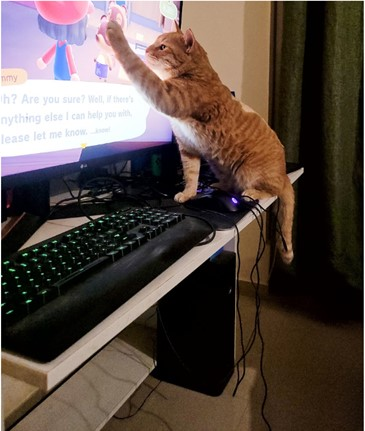

In [ ]:
import PIL.Image

img = PIL.Image.open('cat_pc.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
prompt = """
Describe the given picture first based on what you see.
Then create a short story based on your understanding of the picture.

Output should have both the description and the short story as two separate items
with relevant headings
"""
response = model.generate_content(contents=[prompt, img])

In [ ]:
to_markdown(response.text)

>  **Description:** 
> The picture shows an orange cat sitting on a computer desk. The cat has its paw on the computer screen, and it is looking at the screen intently. There is a keyboard and a mouse on the desk, and a computer monitor is behind the cat.
> 
> **Short Story:** 
> The cat was bored. He had been sitting on the computer desk for hours, watching his owner play video games. He had seen it all before, and he was starting to get tired of it. He wanted to do something, but he didn't know what.
> 
> Suddenly, he had an idea. He would try to play the video game himself! He reached out and put his paw on the keyboard. The owner looked over at him and laughed.
> 
> "What are you doing, Mittens?" he asked. "You can't play video games."
> 
> But Mittens was determined. He started to press the keys on the keyboard, and the owner was amazed. Mittens was actually playing the game!
> 
> The owner watched as Mittens played the game. He was surprised at how good he was. Mittens was able to beat the first level of the game, and he was even able to get to the second level.
> 
> The owner was so impressed that he decided to let Mittens play the game for the rest of the day. Mittens had a lot of fun, and he even beat the game!
> 
> The owner was so happy that he had let Mittens play the game. He realized that even though Mittens was a cat, he was still able to enjoy video games.